In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
Basketball = pd.read_csv('Basketball.csv')

In [3]:
#mostrar las primeras lineas de la data
Basketball.head()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [4]:
Basketball.describe()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


In [5]:
#Muestra información del contenido del dataframe de pandas
Basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
height                 54 non-null float64
weight                 54 non-null int64
success_field_goals    54 non-null float64
success_free_throws    54 non-null float64
avg_points_scored      54 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.2 KB


In [6]:
# The district column has no relevance at this time, so it can be dropped.
Basketball = Basketball.rename(columns={'height':'alturaPies','weight':'pesoLibras','success_field_goals':'%TirosCampoExitosos','success_free_throws':'%TirosLibresExitosos','avg_points_scored':'puntosPromedio'})

In [7]:
Basketball.head()

,alturaPies,pesoLibras,%TirosCampoExitosos,%TirosLibresExitosos,puntosPromedio
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [8]:
#Verificamos cuantos nulos hay en cada columna del dataframe -- isnull, reconoce los nulos
missing_values_count = Basketball.isnull().sum()

In [9]:
missing_values_count[0:15]

alturaPies              0
pesoLibras              0
%TirosCampoExitosos     0
%TirosLibresExitosos    0
puntosPromedio          0
dtype: int64

In [10]:
#Grafico
%matplotlib inline

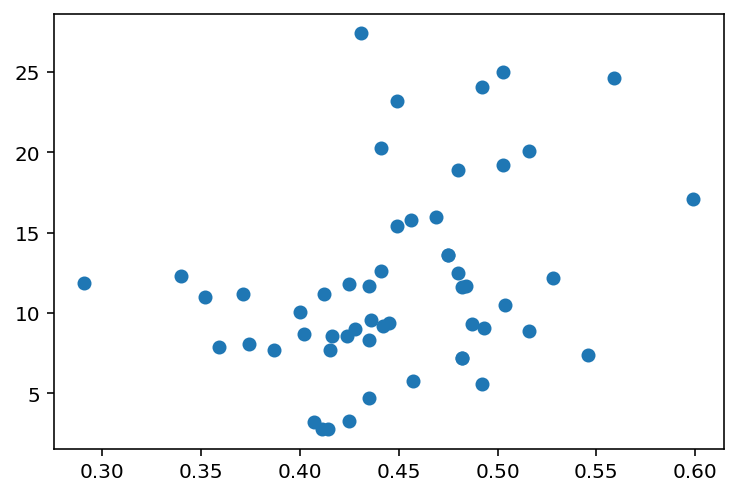

In [11]:
#vemos el diagrama de dispersion
plt.plot(Basketball['%TirosCampoExitosos'],Basketball.puntosPromedio,'o')

In [12]:
# Code Cell 6
# dependent variable for y axis
y = Basketball.puntosPromedio
# independent variable for x axis
x = Basketball['%TirosCampoExitosos']


In [13]:
m, b = np.polyfit(x,y,1)
print ('La pendiente de la linea {:.2f}.'.format(m))
print ('el intercepto es {:.2f}.'.format(b))
print ('El mejor ajuste de la regresion es  {:.2f}x + {:.2f}.'.format(m,b))

La pendiente de la linea 35.34.
el intercepto es -4.08.
El mejor ajuste de la regresion es  35.34x + -4.08.


In [14]:
m, b

(35.33834685042573, -4.080103478083786)

In [15]:
#sacar la media
y_mean=y.mean()
x_mean=x.mean()

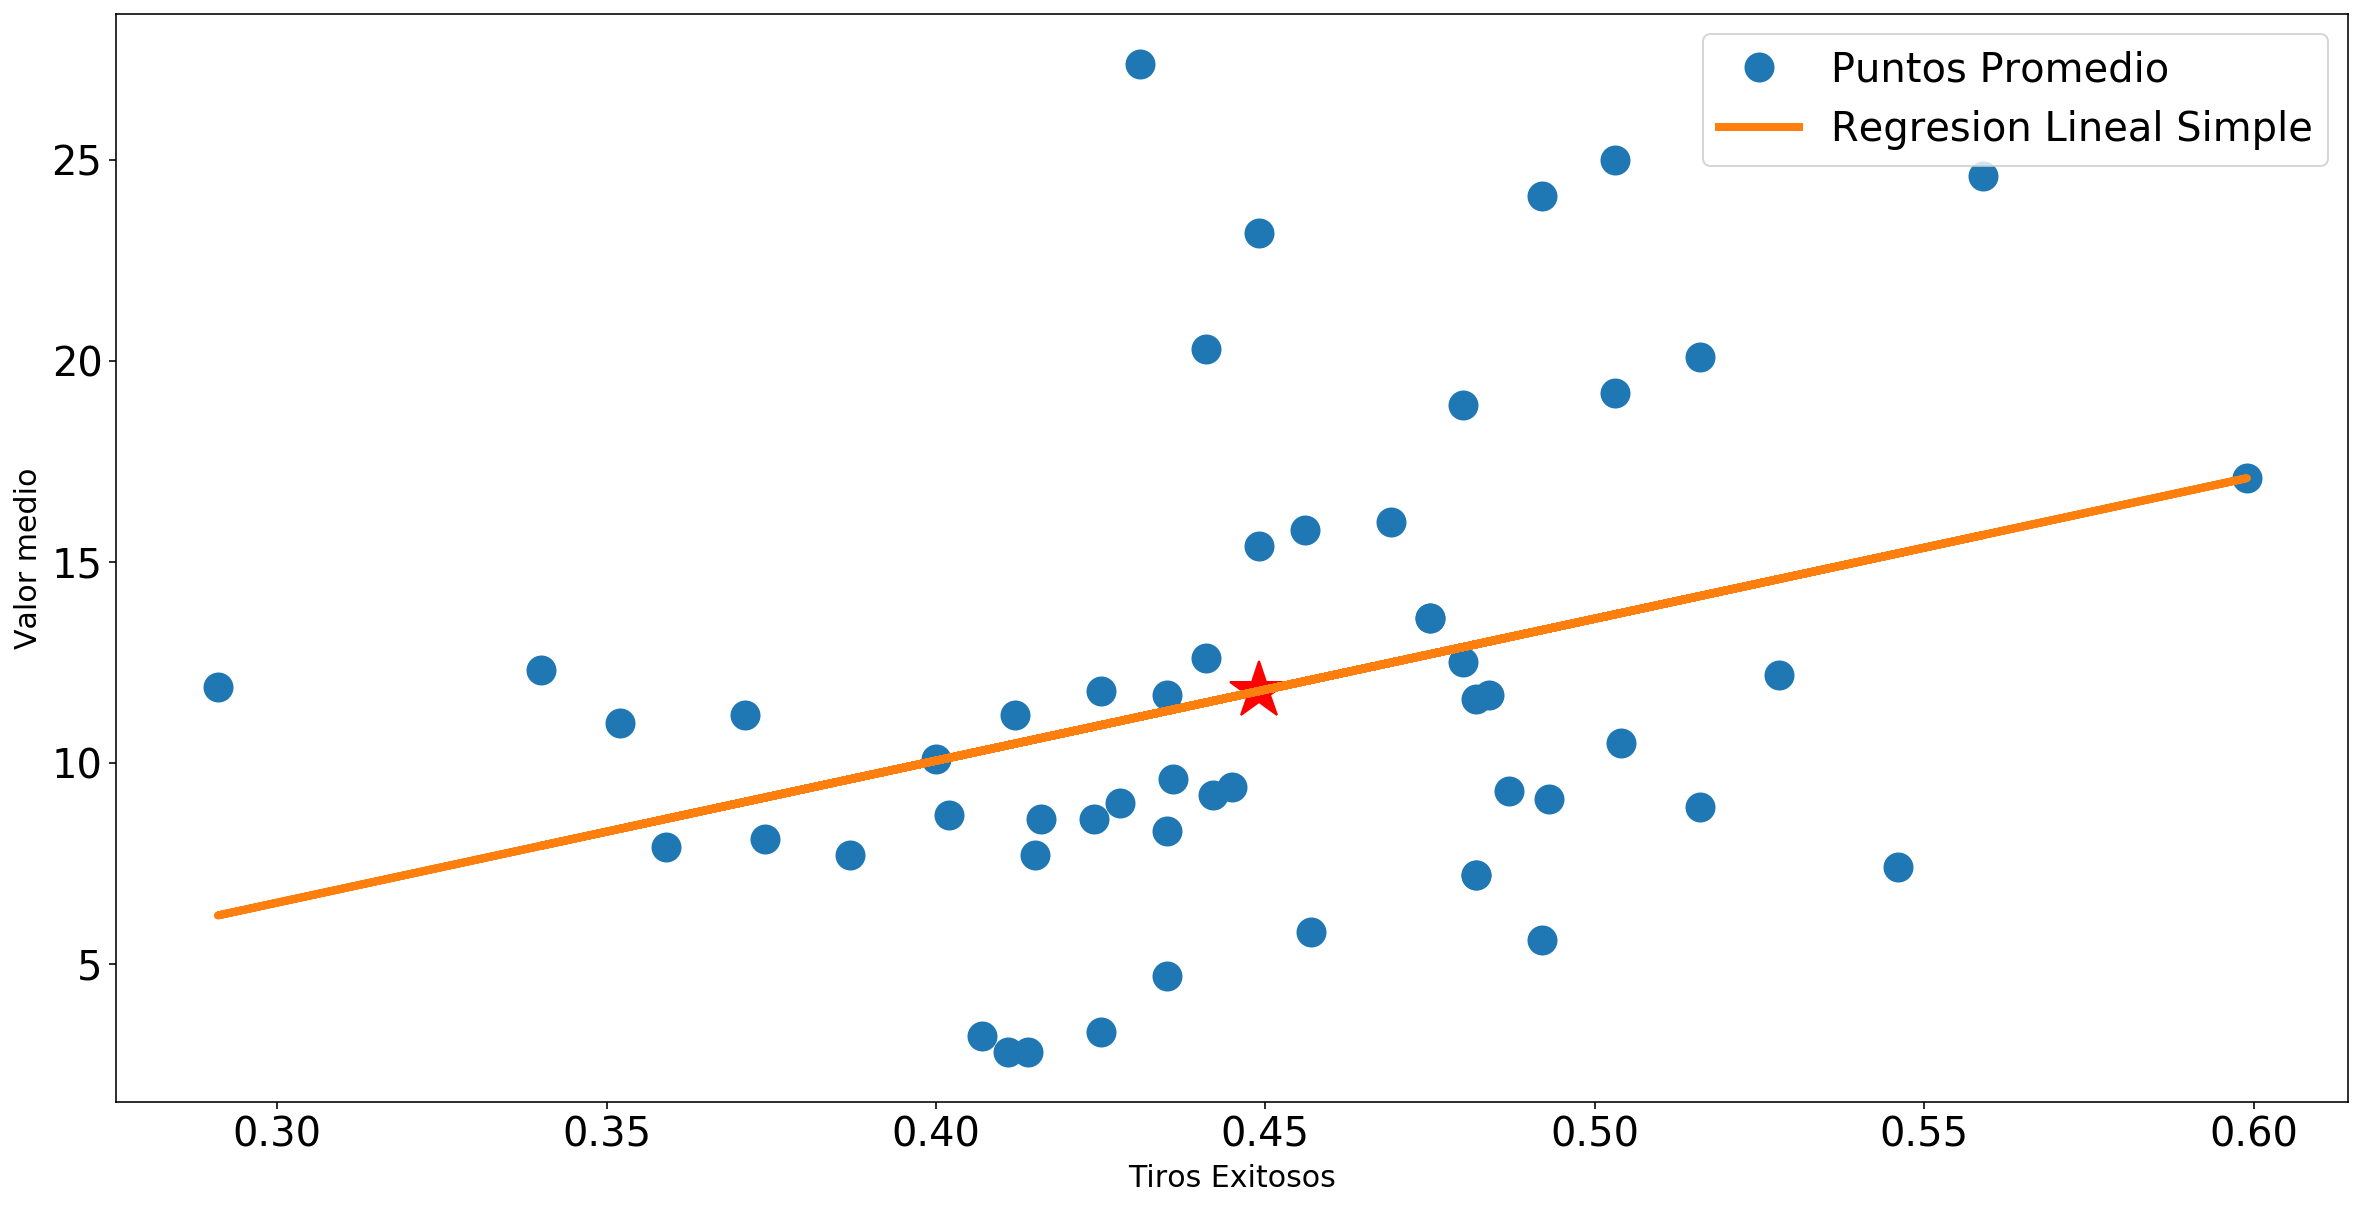

In [16]:
# Code Cell 10
# Create the plot inline
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "Puntos Promedio")

# Plot the centroid point
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r")

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Regresion Lineal Simple', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Valor medio', fontsize = 15)
plt.xlabel('Tiros Exitosos', fontsize = 15)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Create legend
plt.legend(loc = 'upper right', fontsize = 20)


In [17]:
Basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
alturaPies              54 non-null float64
pesoLibras              54 non-null int64
%TirosCampoExitosos     54 non-null float64
%TirosLibresExitosos    54 non-null float64
puntosPromedio          54 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.2 KB


In [18]:
Basketball.head()

,alturaPies,pesoLibras,%TirosCampoExitosos,%TirosLibresExitosos,puntosPromedio
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [19]:
del Basketball['alturaPies']

In [20]:
bins = [0, 8, 15, 18, 25, 40, 60, 100]
names = ['1', '2', '3', '4', '5', '6', '7']
Basketball["%TirosCampoExitosos"] = pd.cut(Basketball["%TirosCampoExitosos"], bins, labels = names)
Basketball["%TirosLibresExitosos"] = pd.cut(Basketball["%TirosLibresExitosos"], bins, labels = names)
Basketball["puntosPromedio"] = pd.cut(Basketball["puntosPromedio"], bins, labels = names)

In [21]:
Basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
pesoLibras              54 non-null int64
%TirosCampoExitosos     54 non-null category
%TirosLibresExitosos    54 non-null category
puntosPromedio          54 non-null category
dtypes: category(3), int64(1)
memory usage: 1.8 KB


In [22]:
#variable objetivo
variableObjet = Basketball.puntosPromedio

In [23]:
# Del dataframe total retiramos la variable objetivo (dependiente) para quedarnos con las variables independientes
x_input= Basketball.drop(['puntosPromedio'], axis=1)

In [24]:
x_input.head()

,pesoLibras,%TirosCampoExitosos,%TirosLibresExitosos
0,225,1,1
1,180,1,1
2,190,1,1
3,180,1,1
4,205,1,1


In [25]:
# Separando el conjunto de datos en 2 grupos: entrenamiento (train) y prueba (test)
#Los datos se han de dividir en un conjunto de entrenamiento que contenga el 80% de los datos y otro de
#test con el resto
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_input,y, test_size=0.20)

In [28]:
a=y_train

In [35]:
cony_traint= y_train.astype("int")
cony_test= y_test.astype("int")

In [39]:
# Definimos Modelo
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
# entrenamientos
model.fit(x_train, cony_traint)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Realizar la predicciòn sobre el conjunto de entrenamiento

predictions1 = model.predict(x_train)

#predictions sobre el train

predictions1

array([ 7,  7, 11, 11, 11,  7,  7, 11, 11, 11, 11,  7, 11, 11,  7,  7,  7,
       11, 11, 11,  7, 11, 11, 11,  7,  7, 11,  7, 11, 11,  7, 11,  7,  7,
        7, 11, 11,  7,  7,  7, 11, 11, 11])

,alturaPies,pesoLibras,%TirosCampoExitosos,%TirosLibresExitosos
0,6.8,225,0.442,0.672
1,6.3,180,0.435,0.797
2,6.4,190,0.456,0.761
3,6.2,180,0.416,0.651
4,6.9,205,0.449,0.900


In [41]:
#Returna el coeficiente de determinación R^2 de  la predicción. Se define como la proporción de la varianza total de la variable explicada por la regresión.
model.score(x_train,cony_traint)


0.23255813953488372